# Lab Session 8 - Coursework Assignment #2
## Preliminaries
In this coursework you will analyse stocks comprising the Standard and Poor's 100 index. The assignment has been structured into separate exercises given below.

You will need to download a .csv-file containing daily adjusted closing prices for the components of the S&P 100 index. This data can be downloaded from the KEATS page.

You can then read this file into a Pandas DataFrame using code similar to that below.



## Import necessary libaries
- import numpy for scientific computing 
- import pandas for transforming csv to dataframe

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

> First, I will check the current working path.

In [144]:
import os
current_path = os.getcwd()
print(current_path)

/Users/andrewyang/Desktop/workspace/Scientific-Computing-For-Finance/lab8


> And then download the S&P index csv "sap100.csv" and move it under the working path we got on the previous step.
> We'll check if the file really exists in the folder before doing futher analystics.

In [145]:
csv_path = current_path + '/sap100.csv'     # set the absolute path of the csv file
print(os.path.isfile(csv_path))             # Return true if the file exists

True


> 1. read the csv file we downloaded and checked last step by the function `pd.read_csv`
> 2. save the dataframe as `prices`
> 3. take a look of the dataframe `prices` to check if the indexs and columns are right by using the function `head()`

In [146]:
prices = pd.read_csv(csv_path)              # read the s&p 100 csv file and store it in a dataframe
prices.head()                               # check the dataframe

,Date,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
0,2016-06-06 00:00:00,24.657499,50.709999,78.660004,50.490002,71.050003,89.339996,39.169998,99.120003,57.290001,...,43.070000,14.712000,61.290001,138.149994,86.849998,103.110001,42.880001,80.540001,62.820000,119.599998
1,2016-06-07 00:00:00,24.757500,51.750000,79.120003,50.270000,71.029999,90.709999,38.930000,98.519997,57.060001,...,43.740002,15.489333,61.560001,136.940002,87.570000,103.870003,42.660000,80.599998,63.099998,119.650002
2,2016-06-08 00:00:00,24.735001,51.520000,79.440002,50.000000,71.279999,90.790001,38.910000,98.680000,56.919998,...,43.910000,15.701333,62.080002,140.399994,89.040001,104.690002,42.810001,81.650002,61.730000,119.320000
3,2016-06-09 00:00:00,24.912500,51.950001,79.010002,49.139999,71.089996,90.669998,38.869999,98.070000,56.099998,...,43.080002,15.290667,62.139999,140.679993,89.389999,104.970001,42.540001,81.260002,60.750000,119.440002
4,2016-06-10 00:00:00,24.707500,52.669998,82.470001,48.340000,71.139999,89.980003,38.400002,97.089996,54.990002,...,41.930000,14.586000,61.910000,139.240005,88.779999,104.519997,41.959999,80.180000,61.000000,118.269997


> 1. We can see the dataframe has 102 columns, which is the fist 2 column `index` and `Date` with 100 stocks.
> 2. The Date type is "YYYY-MM-DD HH:MM:SS"
> 3. The price of the stocks are float numbers
> 4. I don't want the index 0, 1, 2... so I'll have to set `index_col='Date'` while import

In [147]:
prices = pd.read_csv(csv_path)                      # read the s&p 100 csv file and store it in a dataframe with Date as index
pd.to_datetime(prices['Date'])
prices.set_index(pd.to_datetime(prices['Date']), inplace=True)
prices = prices.drop('Date', axis=1)
prices.head()                                       # check the dataframe again

,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,AMGN,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-06,24.657499,50.709999,78.660004,50.490002,71.050003,89.339996,39.169998,99.120003,57.290001,160.190002,...,43.070000,14.712000,61.290001,138.149994,86.849998,103.110001,42.880001,80.540001,62.820000,119.599998
2016-06-07,24.757500,51.750000,79.120003,50.270000,71.029999,90.709999,38.930000,98.519997,57.060001,158.889999,...,43.740002,15.489333,61.560001,136.940002,87.570000,103.870003,42.660000,80.599998,63.099998,119.650002
2016-06-08,24.735001,51.520000,79.440002,50.000000,71.279999,90.790001,38.910000,98.680000,56.919998,158.000000,...,43.910000,15.701333,62.080002,140.399994,89.040001,104.690002,42.810001,81.650002,61.730000,119.320000
2016-06-09,24.912500,51.950001,79.010002,49.139999,71.089996,90.669998,38.869999,98.070000,56.099998,156.779999,...,43.080002,15.290667,62.139999,140.679993,89.389999,104.970001,42.540001,81.260002,60.750000,119.440002
2016-06-10,24.707500,52.669998,82.470001,48.340000,71.139999,89.980003,38.400002,97.089996,54.990002,154.779999,...,41.930000,14.586000,61.910000,139.240005,88.779999,104.519997,41.959999,80.180000,61.000000,118.269997


## Exercise 1
Choose a single stock from the index, and compute the corresponding daily, monthly and annual log-returns. For each sampling frequency, test whether the returns are normally distributed. Include appropriate graphs in your final report and ensure that you clearly explain your analysis in your own words.



> My thoughts:
> 1. Choose a stock, which I decided to choose here is `Nvidia Corp`. Because I know more about this company and maybe having some basic knowledge of the company benifits the analyse.
> 2. The symbol for Nvidia Corp is `NVDA`
> 3. Select the column `NVDA` and save it as `nvda_price` with simply call `prices.NVDA`
> 4. plot the graph and check the graph (rotate the date label to make the plot readable)

<Axes: title={'center': 'NVDA'}, xlabel='Date', ylabel='Price'>

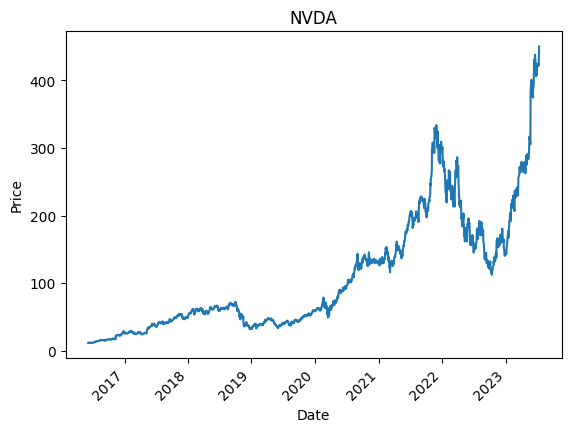

In [148]:
nvda_price = prices.NVDA
nvda_price.plot(title='NVDA',xlabel='Date', ylabel='Price',rot=45 )

> 5.  We will have to do resample and calculate the log returns for three different time ranges, so buliding a function might save more time
> 6.  Build a function called `get_log_return` which has the input of dataframe and the sampling time range, which outputs the plot after resample and the plot of the log return.
> 7. resample the daily, monthly and annual price and store them as `nvda_d`, `nvda_m`, `nvda_y`
> 

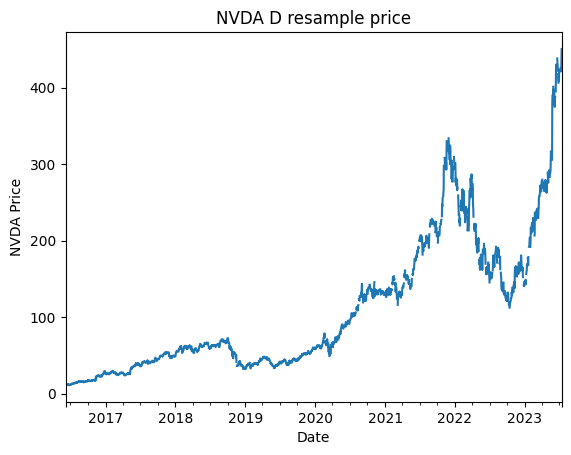

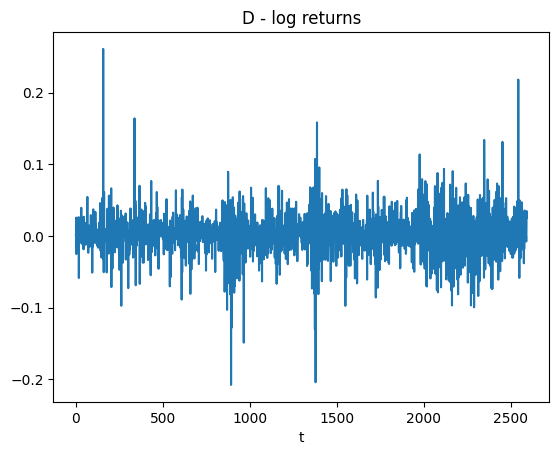

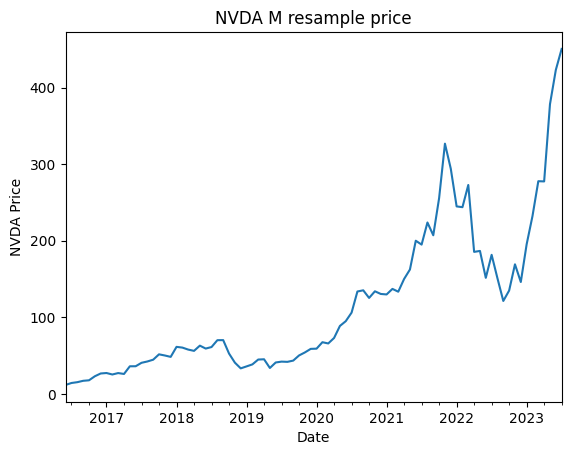

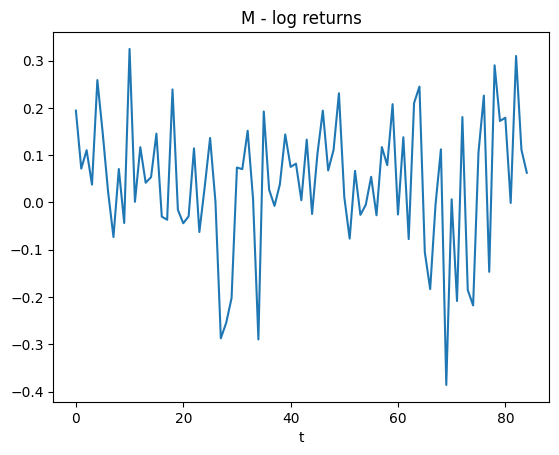

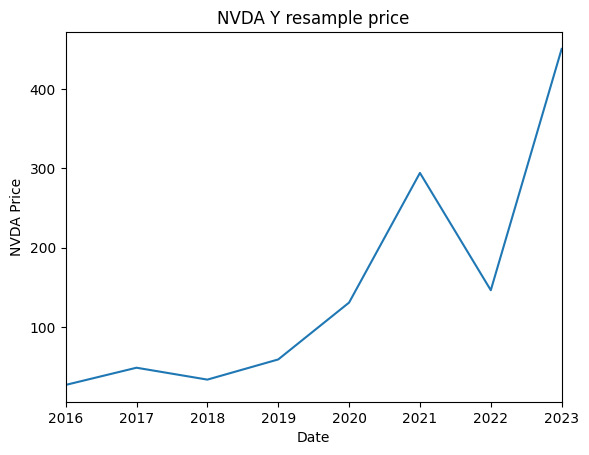

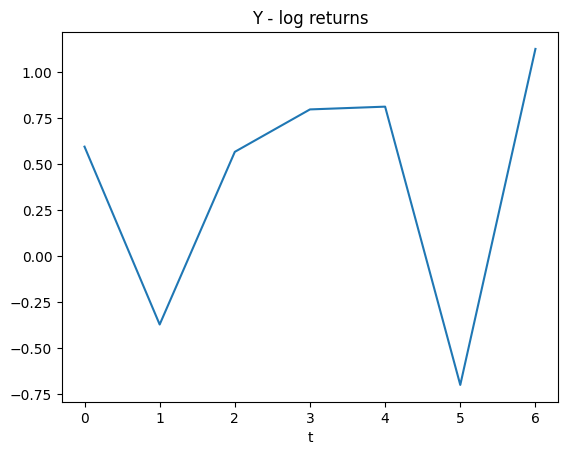

In [237]:
def resample(df, sample_size, plot):
    resample_prices = df.resample(sample_size).last()
    if plot:
        resample_prices.plot()
        plt.title('NVDA '+sample_size+ ' resample price')
        plt.ylabel('NVDA Price')
        plt.show()
    return resample_prices

def log_return(df,sample_size, plot):
    stock_returns = np.diff(np.log(df))
    if plot:
        plt.plot(stock_returns)
        plt.xlabel('t')
        plt.title(sample_size + ' - log returns')
        plt.show()
    return stock_returns

def get_log_return(df, sample_size, plot=True):
    resample_prices = resample(df, sample_size, plot).ffill()
    stock_returns = log_return(resample_prices, sample_size, plot)
    return stock_returns

nvda_d = get_log_return(nvda_price,'D')
nvda_m = get_log_return(nvda_price,'M')
nvda_y = get_log_return(nvda_price,'Y')

> 8. Now we have the returns, it's time to check if they are normally distributed.
> 9. To check if a series is normally distributed, we can try to observe the `pd.describe`, `histogram`, `box plot` and the `qq plot`
> 10. Build a function to generate these three observations named `normally_dist_vis_check`

In [233]:
def normally_dist_vis_check(df, stock, frequency):
    print(df.describe())

    plt.figure(figsize=(12, 12))

    plt.subplot(221)
    sns.histplot(df, kde=True)
    plt.title(f'Histogram of {frequency} Returns')
    
    plt.subplot(222)
    stats.probplot(stock, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {frequency} Returns')
    
    plt.subplot(223)
    sns.boxplot(df)
    plt.title(f'Boxplot of {frequency} Returns')

    plt.suptitle(f'{frequency} Log Returns')
    plt.show()


> 11. We run the test on the daily returns first

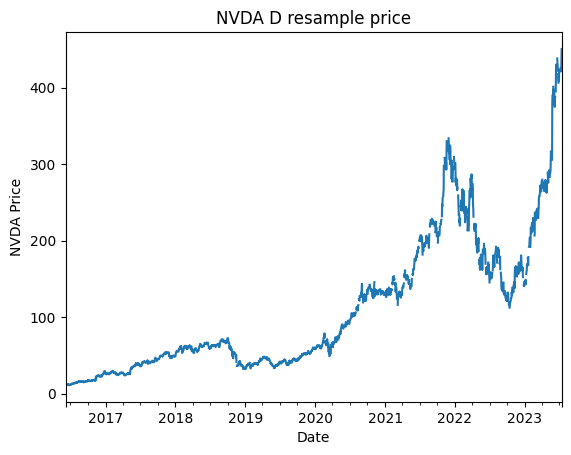

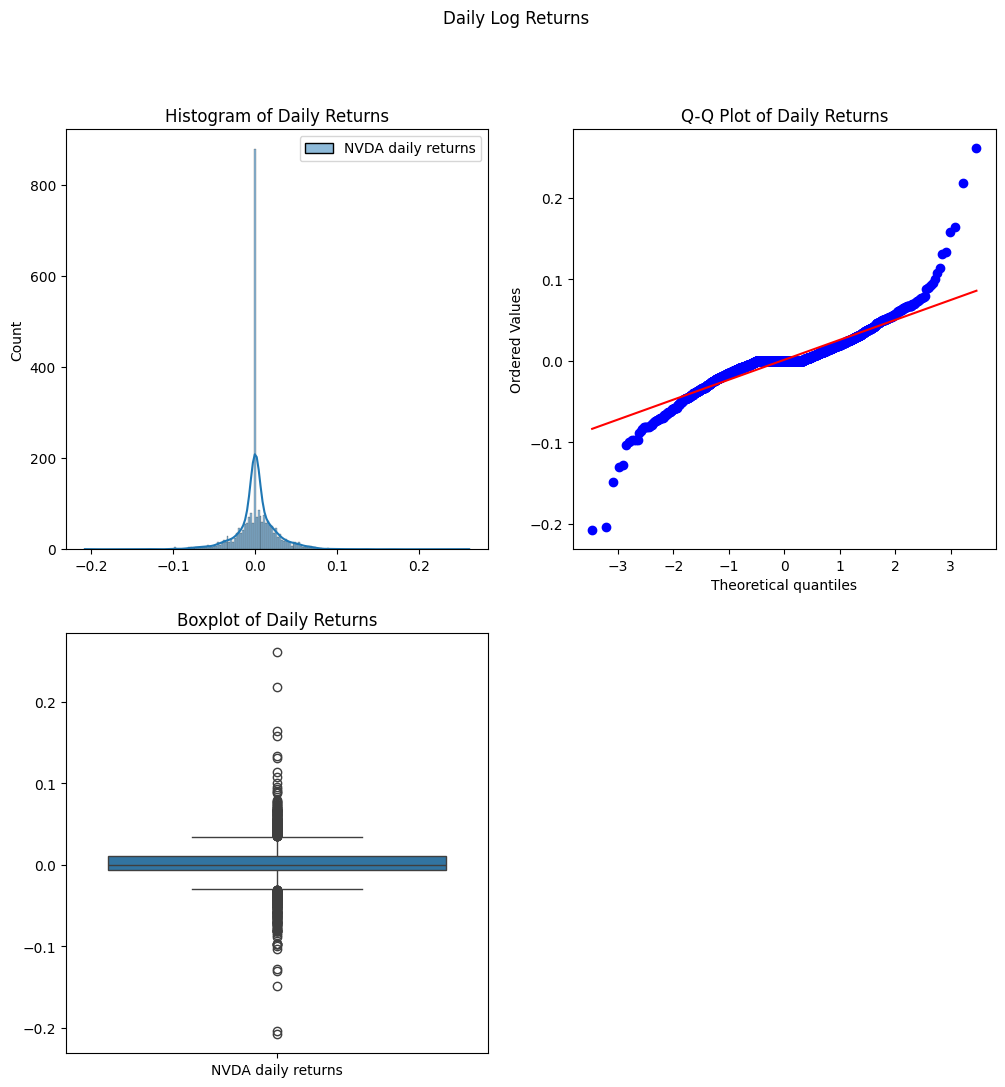

In [238]:

nvda_d_ = pd.DataFrame({'NVDA daily returns': nvda_d}, index=resample(nvda_price, 'D', plot=True).index[1:])
normally_dist_vis_check(nvda_d_,nvda_d, 'Daily')

In [176]:
stats.jarque_bera(nvda_d)

SignificanceResult(statistic=14317.890522906022, pvalue=0.0)

### Normaltest (D'Agostino and Pearson's test):
This test combines skewness and kurtosis to produce an omnibus test of normality. The skewness measures the asymmetry of the data around the sample mean, and the kurtosis measures the 'tailedness' of the distribution. A normal distribution has a skewness of zero and a kurtosis of three. The `normaltest` calculates how much the sample data deviates from these values and evaluates the significance of this deviation.

The test statistic is computed as:
```
s^2 + k^2
```
where `s` is the z-score of the skewness and `k` is the z-score of the kurtosis.

In [175]:
from scipy.stats import normaltest
daily_normal_test = normaltest(nvda_d)
daily_normal_test

NormaltestResult(statistic=519.414013199318, pvalue=1.6243519052138923e-113)

In [173]:
stats.jarque_bera(nvda_y)

SignificanceResult(statistic=0.9396812131562792, pvalue=0.6251018974728205)

In [ ]:
nvda_m_ = pd.DataFrame({'NVDA daily returns': nvda_m}, index=resample(nvda_price, 'M').index[1:])
normally_dist_vis_check(nvda_m_, nvda_m)

In [ ]:
nvda_y_ = pd.DataFrame({'NVDA daily returns': nvda_y}, index=resample(nvda_price, 'Y').index[1:])
normally_dist_vis_check(nvda_y_, nvda_y)

## Exercise 2
Compute the Jarque-Bera test statistic and 
p
-values for all stocks in the index over daily, monthly and annual frequencies. Summarise your results in a single graph which shows three side-by-side boxplots of the test statistic comparing: daily, monthly and annual return distributions. Comment on whether your results support the claim that stock returns exhibit aggregational Gaussianity (see, e.g., Cont 2001; reference below).

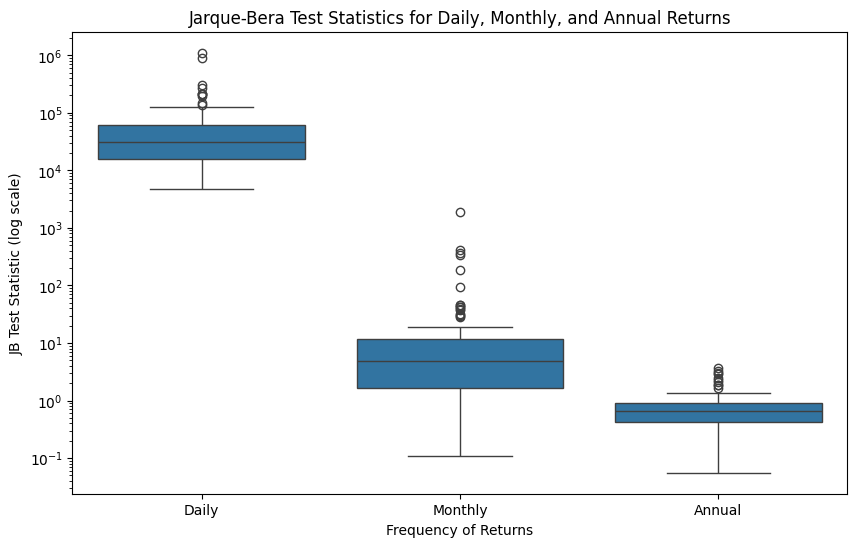

In [217]:
prices = pd.read_csv('sap100.csv', index_col='Date', parse_dates=True)

prices = prices.drop(columns=['BRK.B', 'DOW','FB'])
# Create empty dictionaries to store the Jarque-Bera test results
jb_daily_stats = {}
jb_monthly_stats = {}
jb_annual_stats = {}

# Loop through each column (i.e., each stock ticker) in the DataFrame
for ticker in prices.columns:
    # Compute daily, monthly, and annual log-returns
    log_returns_daily = get_log_return(prices[ticker],'D', plot=False)
    log_returns_monthly = get_log_return(prices[ticker],'M', plot=False)
    log_returns_annual = get_log_return(prices[ticker],'Y', plot=False)
    
    # Compute Jarque-Bera test for each frequency
    jb_daily_stats[ticker] = stats.jarque_bera(log_returns_daily)[0] # Only keeping the test statistic
    jb_monthly_stats[ticker] = stats.jarque_bera(log_returns_monthly)[0]
    jb_annual_stats[ticker] = stats.jarque_bera(log_returns_annual)[0]

# Convert the results to DataFrames for plotting
jb_daily_df = pd.DataFrame(list(jb_daily_stats.items()), columns=['Ticker', 'JB_Statistic'])
jb_monthly_df = pd.DataFrame(list(jb_monthly_stats.items()), columns=['Ticker', 'JB_Statistic'])
jb_annual_df = pd.DataFrame(list(jb_annual_stats.items()), columns=['Ticker', 'JB_Statistic'])

# Create a combined DataFrame
jb_combined_df = pd.concat([jb_daily_df.assign(Frequency='Daily'),
                            jb_monthly_df.assign(Frequency='Monthly'),
                            jb_annual_df.assign(Frequency='Annual')])

# Plotting the side-by-side boxplots
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='Frequency', y='JB_Statistic', data=jb_combined_df)
boxplot.set_yscale('log')
plt.title('Jarque-Bera Test Statistics for Daily, Monthly, and Annual Returns')
plt.ylabel('JB Test Statistic (log scale)')
plt.xlabel('Frequency of Returns')
plt.show()

## Exercise 3
Download data for the S&P 100 index (symbol ^OEX), and repeat Exercise 1 with this data.

[*********************100%%**********************]  1 of 1 completed


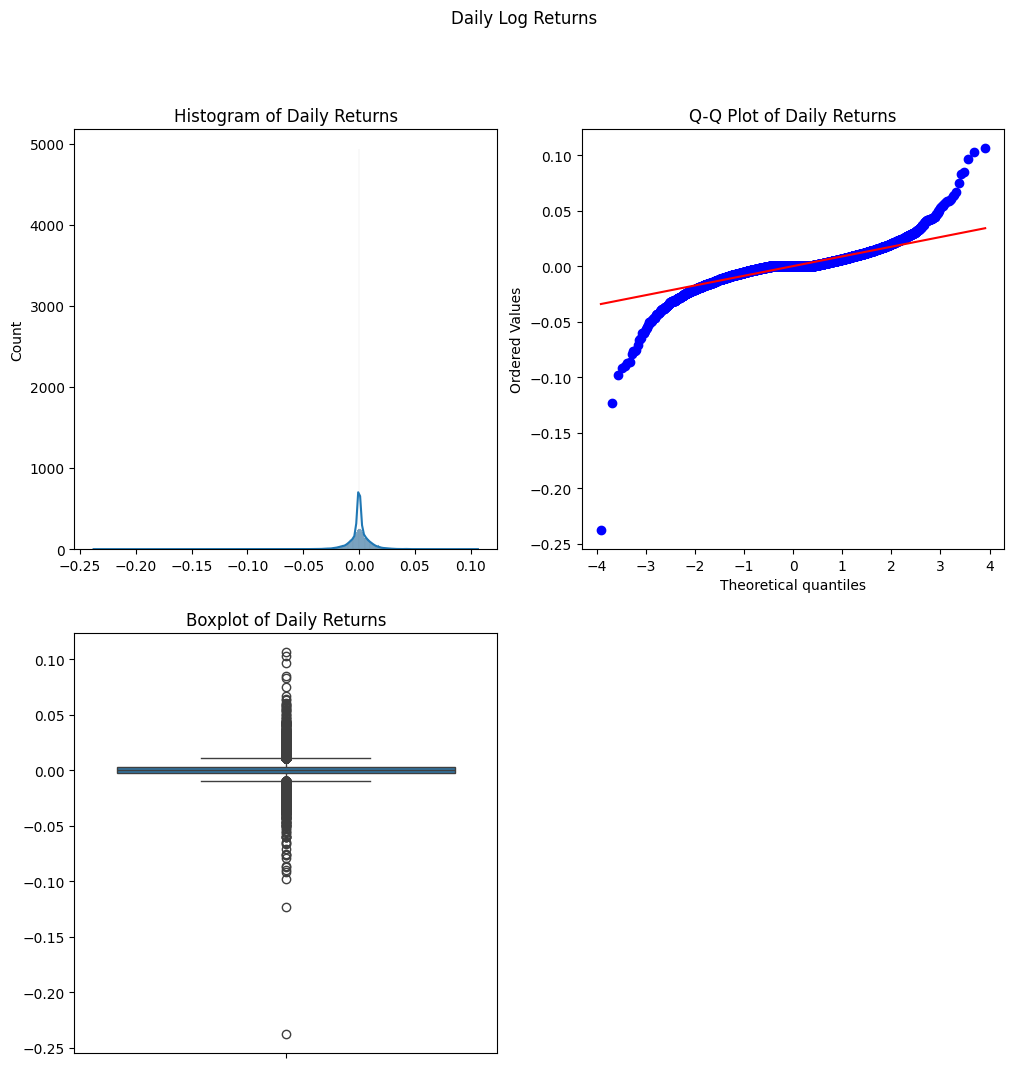

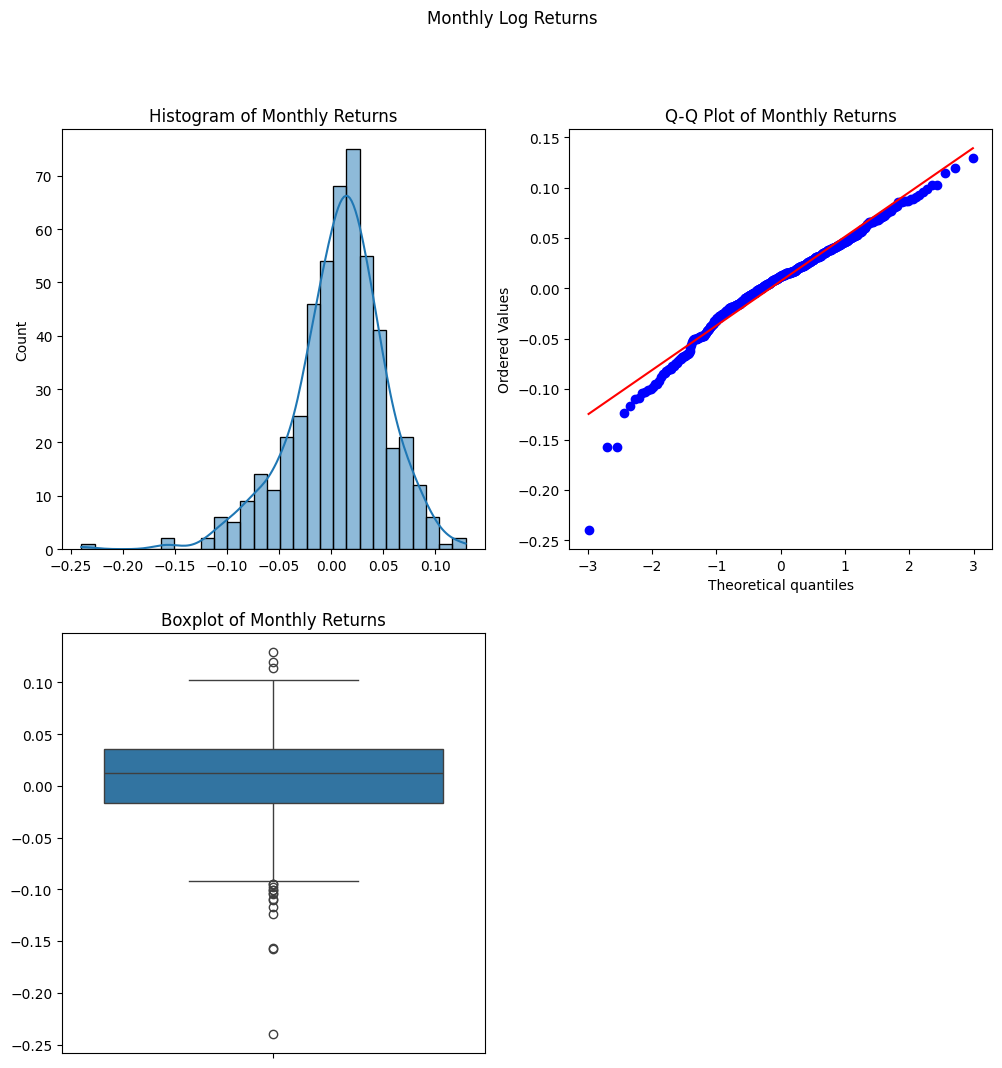

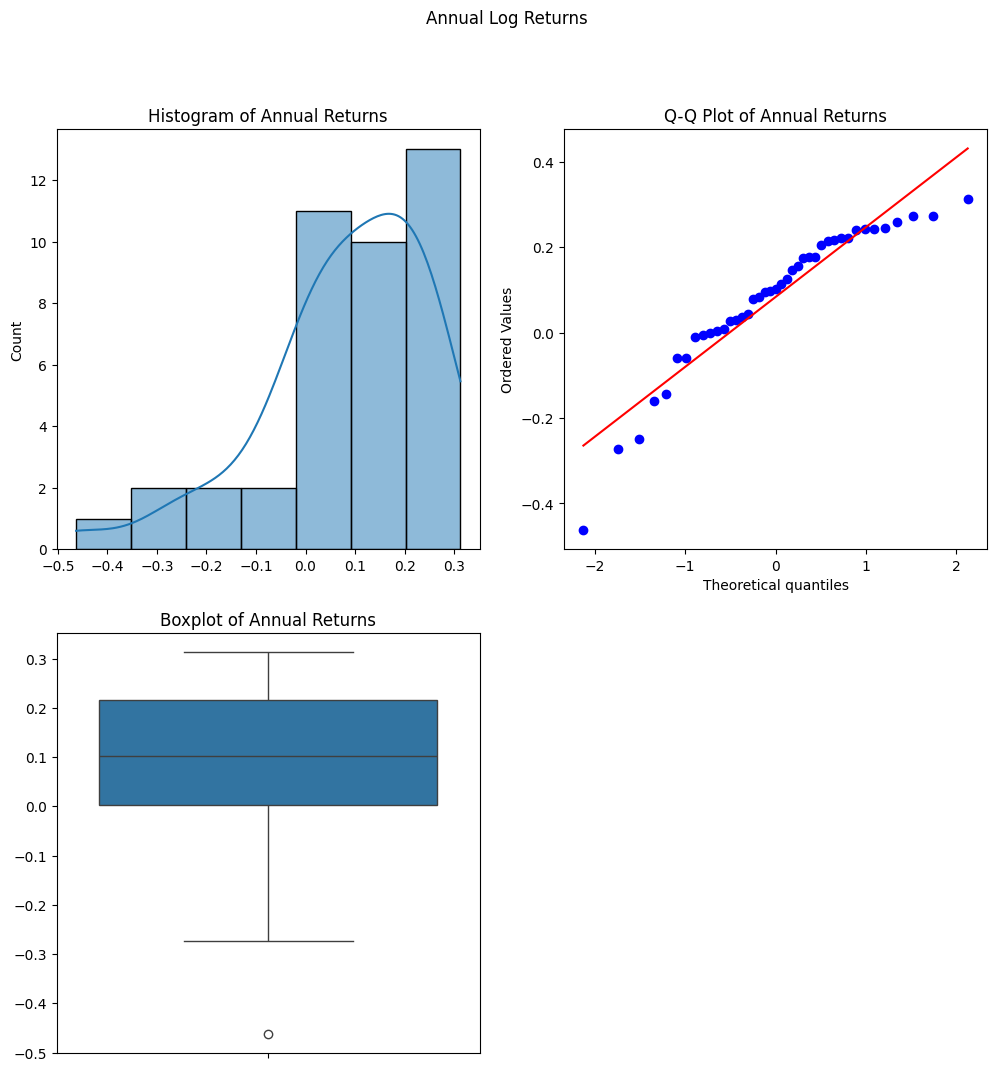

Daily returns normality test: Statistic=7059.597487860668, P-value=0.0
Monthly returns normality test: Statistic=72.37135797353939, P-value=1.9264568778048038e-16
Annual returns normality test: Statistic=12.98094551449189, P-value=0.0015178312726916658


In [239]:
import yfinance as yf
from pandas_datareader import data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import seaborn as sns

# Override yfinance with pandas_datareader
yf.pdr_override()

# Download the S&P 100 index data using yfinance
sp100_index = data.get_data_yahoo("^OEX")

# Calculate log-returns
sp100_daily_returns = get_log_return(sp100_index['Adj Close'],'D', plot=False)
sp100_monthly_returns = get_log_return(sp100_index['Adj Close'],'M', plot=False)
sp100_annual_returns = get_log_return(sp100_index['Adj Close'],'Y', plot=False)

# Perform the normality test on the returns
normal_test_daily = normaltest(sp100_daily_returns)
normal_test_monthly = normaltest(sp100_monthly_returns)
normal_test_annual = normaltest(sp100_annual_returns)


# Plotting histograms and probplots for Daily, Monthly, and Annual returns
normally_dist_vis_check(sp100_daily_returns, sp100_daily_returns, 'Daily')
normally_dist_vis_check(sp100_monthly_returns, sp100_monthly_returns, 'Monthly')
normally_dist_vis_check(sp100_annual_returns, sp100_annual_returns, 'Annual')

# Print normality test results
print(f'Daily returns normality test: Statistic={normal_test_daily[0]}, P-value={normal_test_daily[1]}')
print(f'Monthly returns normality test: Statistic={normal_test_monthly[0]}, P-value={normal_test_monthly[1]}')
print(f'Annual returns normality test: Statistic={normal_test_annual[0]}, P-value={normal_test_annual[1]}')

## Exercise 4
Estimate the 
α
 and 
β
 of each stock according to the single-index model using ordinary least squares regression over monthly excess returns, storing your results in a DataFrame. Produce a single graph showing side-by-side boxplots summarising the distribution of the alpha and beta coefficients over all stocks in the index.



In [252]:
sp100_monthly_returns = sp100_index['Adj Close'].resample('M').ffill().pct_change().dropna()
stocks_monthly_returns = prices.resample('M').ffill().pct_change().dropna()

# Assume a risk-free rate proxy (risk-free rate is zero if we don't have data)
risk_free_rate = 0
sp100_excess_returns = sp100_monthly_returns - risk_free_rate
stocks_excess_returns = stocks_monthly_returns.sub(risk_free_rate, axis=0)  # Excess returns for all stocks

In [253]:
import statsmodels.api as sm
alphas_betas = pd.DataFrame(index=prices.columns, columns=['alpha', 'beta'])

for ticker in prices.columns:
    # Prepare the data for regression
    y = stocks_excess_returns[ticker].dropna()
    X = sp100_excess_returns.loc[y.index]
    
    regression_result = (beta, alpha, rvalue, pvalue, stderr) = \
    stats.linregress(x=X, y=y)
    print(regression_result)
    alphas_betas.loc[ticker, 'alpha'] = alpha
    alphas_betas.loc[ticker, 'beta'] = beta
    # Add a constant to the independent variable
    #X_sm = sm.add_constant(X)
    
    # Perform regression
    #model = sm.OLS(y, X_sm).fit()
    
    # Store the results
    #alphas_betas.loc[ticker, 'alpha'] = model.params['const']
    #beta_key = X.name if X.name is not None else 'x1'
    #alphas_betas.loc[ticker, 'beta'] = model.params[beta_key]
    
# Drop rows with any NaN values (stocks that did not have enough data for regression)
alphas_betas.dropna(inplace=True)

LinregressResult(slope=1.3146522896962363, intercept=0.013706986203515278, rvalue=0.7376434831763959, pvalue=8.155373140237624e-16, stderr=0.13208442568512815, intercept_stderr=0.006327275767288207)
LinregressResult(slope=0.3814081904026803, intercept=-0.008611756041461513, rvalue=0.36637475942714215, pvalue=0.0005636503759760457, stderr=0.1063228409418054, intercept_stderr=0.005093211644831108)
LinregressResult(slope=0.6645883956770601, intercept=-0.016155200549493404, rvalue=0.38626722363683846, pvalue=0.0002609480683341027, stderr=0.17419632392563444, intercept_stderr=0.008344573354566608)
LinregressResult(slope=1.0877141451727879, intercept=-0.008890821166947876, rvalue=0.5678544167579952, pvalue=1.4472285859456636e-08, stderr=0.17306395657577592, intercept_stderr=0.008290329256859675)
LinregressResult(slope=0.5757375170695752, intercept=0.003984232958460125, rvalue=0.5016956263546936, pvalue=1.0017520883935774e-06, stderr=0.10896411021223579, intercept_stderr=0.00521973707705365)


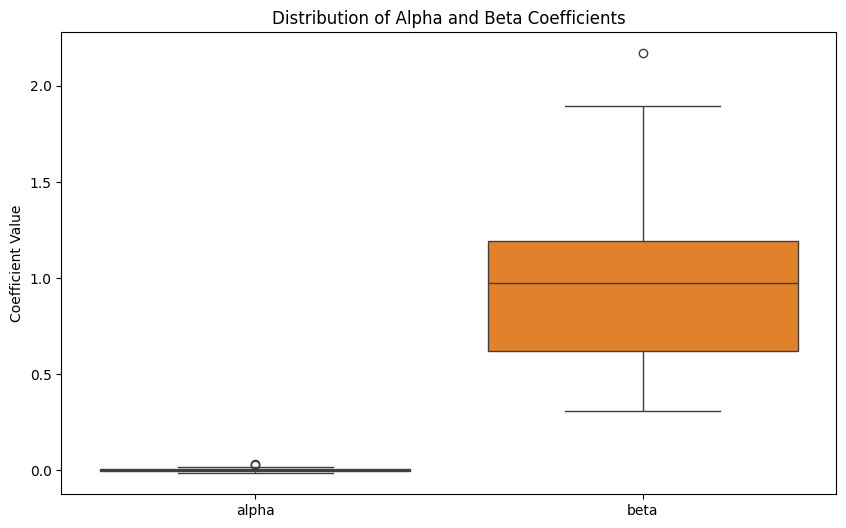

In [254]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=alphas_betas)
plt.title('Distribution of Alpha and Beta Coefficients')
plt.ylabel('Coefficient Value')
plt.show()

## Exercise 5
Compute the covariance matrix of the components of the index using the monthly excess-returns. According to the single-index model (see Elton and Gruber 1997; reference below), the covariance of a given pair of stocks should be directly proportional to the product of the corresponding 
β
 values. Test this hypothesis, and summarise your results in a single graph. Provide a written explanation of your results, and a short critical discussion.

To test the hypothesis stated in the single-index model (as per Elton and Gruber, 1997), we need to follow these steps:
1. Compute the covariance matrix of the monthly excess returns.
2. Calculate the covariances according to the single-index model, which would be proportional to the product of the corresponding beta values.
3. Compare the empirical covariances with the predicted covariances from the single-index model.
4. Visualize this relationship in a graph.
5. Provide an explanation and critical discussion.

Let's assume you have already calculated the monthly excess returns and the beta values for each stock as shown in the previous exercises. Now we will compute the covariance matrix and test the hypothesis:


In this script:
- We calculate the empirical covariance matrix of stock excess returns.
- We calculate the predicted covariance for each pair of stocks based on the single-index model formula, which involves the product of their beta values and the market variance.
- We then plot a scatter plot comparing the empirical covariances with the predicted covariances. If the single-index model held perfectly, all points would lie on the diagonal line (where empirical=covariance predicted).

When explaining these results, consider the following:
- The single-index model assumes that a stock's return is only related to the market index, ignoring the firm-specific and industry-specific factors that could also affect returns and thereby covariances.
- A perfect agreement between predicted and empirical covariances would suggest that non-systematic risk is insignificant or diversified away, whereas discrepancies can highlight the influence of idiosyncratic risk.

In reality, the single-index model is a simplification, and we might observe deviations from the diagonal line due to several reasons, including the omitted factors mentioned above, non-linear relationships between stock and market returns, and change in betas over time.

In your discussion, you should critically analyze these factors and other limitations of the single-index model, taking into account the empirical evidence from your scatter plot. Assess the extent to which the single-index model explains the empirical covariances or fails to capture the complex interactions between individual stock returns.

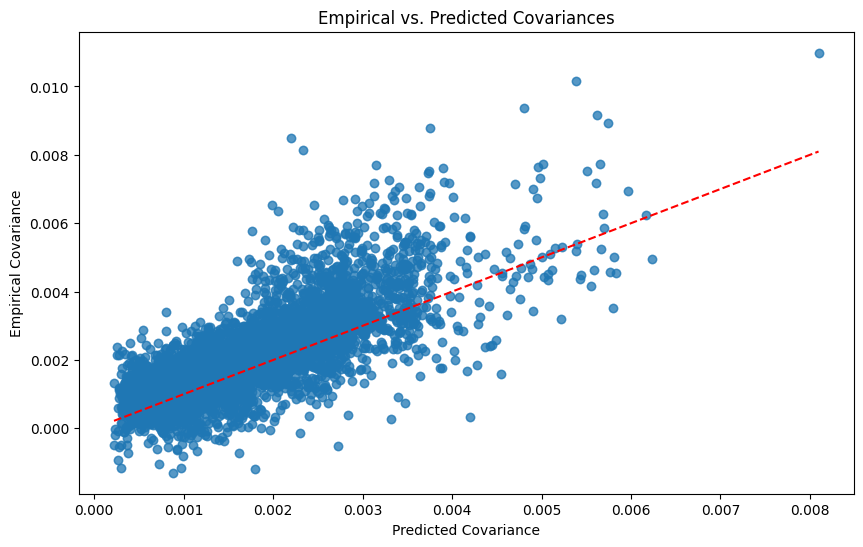

In [256]:
cov_matrix = stocks_excess_returns.cov()

# Assuming alphas_betas Dataframe from the previous exercise contains the beta values
betas = alphas_betas['beta']

# Calculate the covariances according to the single-index model
market_variance = sp100_monthly_returns.var()
predicted_covariances = np.outer(betas, betas) * market_variance

# Convert predicted_covariances to a DataFrame for easier manipulation
predicted_cov_df = pd.DataFrame(predicted_covariances, index=prices.columns, columns=prices.columns)

# Flatten the covariance matrices and remove self-covariances (variance)
empirical_covariances = cov_matrix.values.flatten()
predicted_covariances = predicted_cov_df.values.flatten()
mask = np.eye(len(prices.columns), dtype=bool)

empirical_covariances = empirical_covariances[~mask.flatten()]
predicted_covariances = predicted_covariances[~mask.flatten()]

# Plotting the relationship between empirical and predicted covariances
plt.figure(figsize=(10, 6))
plt.scatter(predicted_covariances, empirical_covariances, alpha=0.5)
plt.title('Empirical vs. Predicted Covariances')
plt.xlabel('Predicted Covariance')
plt.ylabel('Empirical Covariance')
plt.plot([min(predicted_covariances), max(predicted_covariances)],
         [min(predicted_covariances), max(predicted_covariances)],
         'r--')  # Line representing perfect agreement
plt.show()

array([0.000987394885683593, 0.0017204957824408112, 0.0028158896716282073,
       ..., 0.0021059077077875098, 0.0022005344266820886,
       0.001382024823314761], dtype=object)